---

# Periodic systems

Exercises for periodic systems, like an accelerator ring (exercises 17-27).

---

In [1]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 18
Try to find an initial beam matrix sigma0 by **try and error** that reproduces itself at the end of the beam line (5 FODO cells). You will quickly realise that this is extremely difficult if not impossible. 

**Hint 1**: (optional) you might want to use an **interactive plot** - see in the previous exercises how to make one

**Hint 2**: try, but **don't waist to much time with try and error** approaches (that's not your job as accelerator physicist!), and **move on** to the next exercise...

#### SOLUTION

In [2]:
# code here your solution...

# This problem is not so simple: there are three parameters to fix so it can be quite cumbersome... 
# We can still try with an animated plot.

#lattice
f = 2.5
L = 2
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)

def plotIt(sigma11, sigma22, sigma12):
    #prepare the sigma matrix
    sigma0 = np.array([[sigma11, sigma12 ],[sigma12, sigma22]])

    output_b = transportSigmas(sigma0, 5*fodo_lattice)
    plt.figure(figsize=(15,6))
    plt.subplot(311)
    plt.plot(output_b['s'], output_b['sigma11'], '-b', lw=3)
    plt.ylabel('sigma11')
    plt.grid(True)
    plt.subplot(312)
    plt.plot(output_b['s'], output_b['sigma22'], '-r', lw=3)
    plt.ylabel('sigma22')
    plt.grid(True)
    plt.subplot(313)    
    plt.plot(output_b['s'], output_b['sigma12'], '-k', lw=3)
    plt.ylabel('sigma12')
    plt.grid(True)
    
interactive_plot = interactive(plotIt,sigma11=(10,20,.1),sigma22=(0,4,.1),sigma12=(-5,5,.1),continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='sigma11', max=20.0, min=10.0), FloatSlider(value=2.…

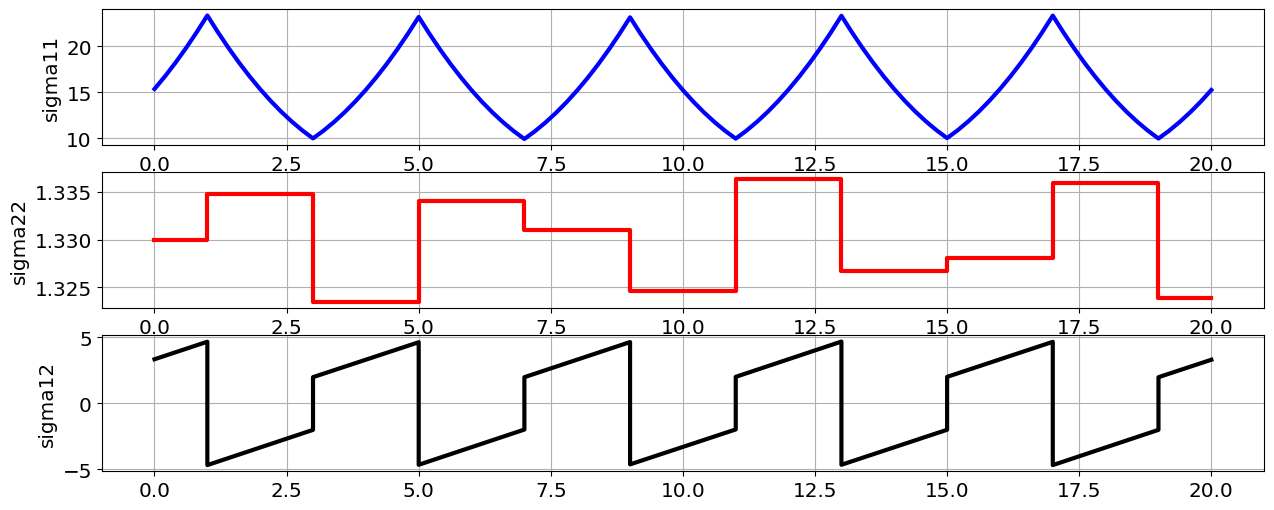

In [3]:
# **approximate** solution found by hand:
plotIt(15.37, 1.33, 3.34)

### Exercise 19

Try to simplify the problem of previous exercise. **Recall** [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/):

<p align="center">
<img src=./_img_exercises/slide_fodo_periodic.png width="60%">
</p>

In a FODO cell the $\beta$ function reaches a maximum (or a minimum) in the middle of the quadrupoles, i.e. the $\alpha$ function is zero.
If one models the FODO cell starting from the middle of a quadrupole (instead of the middle of a drift), then at least one parameter is fixed.

Even better: one can use the equation form [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/) to find the theoretical solution.

**Hint**: A half-quadrupole has double the focal length than a full quadrupole.

#### SOLUTION

In [4]:
# code here your solution...







#### SOLUTION 1

In [5]:
# We can then proceed again by try and error...
f = 2.5
L = 2

# same structure, but starting the fodo cell from the center of a quadrupole:
fodo_lattice = Q(2*f) + 10*D(L/10) + Q(-f) + 10*D(L/10) + Q(2*f)

def plotIt(sigma11, sigma22):
    #prepare the sigma matrix
    sigma0 = np.array([[sigma11, 0 ],[0, sigma22]])

    output_b = transportSigmas(sigma0, 5*fodo_lattice)
    plt.figure(figsize=(15,6))
    plt.subplot(311)
    plt.plot(output_b['s'], output_b['sigma11'], '-b', lw=3)
    plt.ylabel('sigma11')
    plt.grid(True)
    plt.subplot(312)
    plt.plot(output_b['s'], output_b['sigma22'], '-r', lw=3)
    plt.ylabel('sigma22')
    plt.grid(True)
    plt.subplot(313)    
    plt.plot(output_b['s'], output_b['sigma12'], '-k', lw=3)
    plt.ylabel('sigma12')
    plt.grid(True)

interactive_plot = interactive(plotIt,sigma11=(0,25,.1),sigma22=(0,4,.1),continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=12.0, description='sigma11', max=25.0), FloatSlider(value=2.0, descrip…

#### SOLUTION 2

We can use the learned during [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/) for this particular configuration:

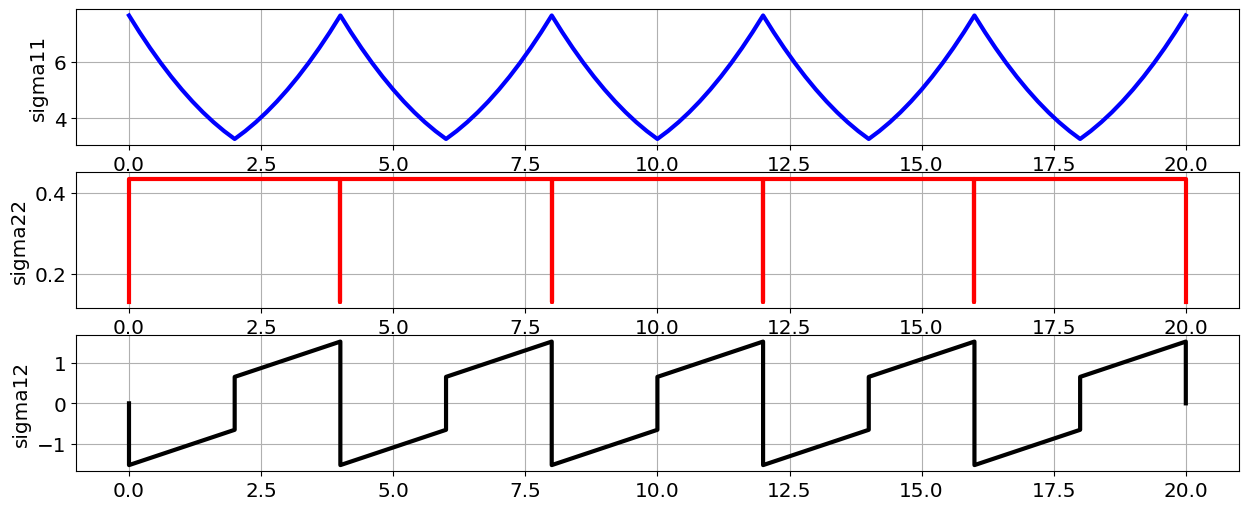

In [6]:
# get the one turn matrix:
fodo_lattice_reduced = getEquivalentElement(fodo_lattice)
# extract the matched initial conditions
sigma11 = fodo_lattice_reduced[0]['matrix'][0,1]/np.sqrt(1-(fodo_lattice_reduced[0]['matrix'][0,0])**2)
sigma22 = 1/sigma11
sigma12 = 0
# plot the solution (using function from previous exercise)
plotIt(sigma11, sigma22)

## General solution

**Recall** [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/). In a periodic beam line, the transfer matrix assumes the form:

\begin{equation}
M = 
    \left[
    \begin{array}{cc}
    \cos(\mu) + \alpha_0 \sin(\mu)  & \beta_0 \sin(\mu)\\
    - \gamma_0 \sin(\mu) & \cos(\mu) - \alpha_0 \sin(\mu)
    \end{array}
    \right]
\end{equation}

where $\alpha_0$, $\beta_0$, $\gamma_0$ are the initial (and final) Twiss values and $\mu$ is the phase advance (or tune, if we talk about a whole ring) of the associated beamline.
From this expression, one can extract the periodic solution of any beamline, assuming it exists!

Note: Since the determinant of $M$ must be one, then one can verify that the trace of the matrix R must be $|\mathrm{Tr}(M)| \le 2$ to ensure the existence of such a solution.

This can be implemented in an useful function:

In [7]:
def twiss(beamline):
    '''
    Computes and returns the closed solution (if it exist!) Tune (Q) and Twiss parameters 
    beta, alpha, gamma of the given beamline.
    '''

    # first, compute the equivalent "One-Turn-Map", and extract its matrix:
    OTM = getEquivalentElement(beamline)
    R = OTM[0]['matrix']
    
    # check that this matrix is stable:
    if np.abs(0.5*(R[0,0]+R[1,1])) > 1:
        raise ValueError('This beamline is not stable!')
    
    # all relevant Twiss parameters can be extrcted from the matrix:
    mu = np.arccos(0.5*(R[0,0]+R[1,1]))
    if (R[0,1]<0): 
        mu = 2*np.pi-mu
    Q = mu/(2*np.pi)
    beta = R[0,1]/np.sin(mu)
    alpha = (0.5*(R[0,0]-R[1,1]))/np.sin(mu)
    gamma = (1+alpha**2)/beta
    
    return Q, beta, alpha, gamma

### Exercise 20

Let's go back to our initial FODO cell, starting from the middle of a drift.
Find the range of focal lengths $f$ for which the FODO cells permit stable oscillations based on the newly introduced condition (i.e. $|Tr(R)| \le 2$)

#### SOLUTION


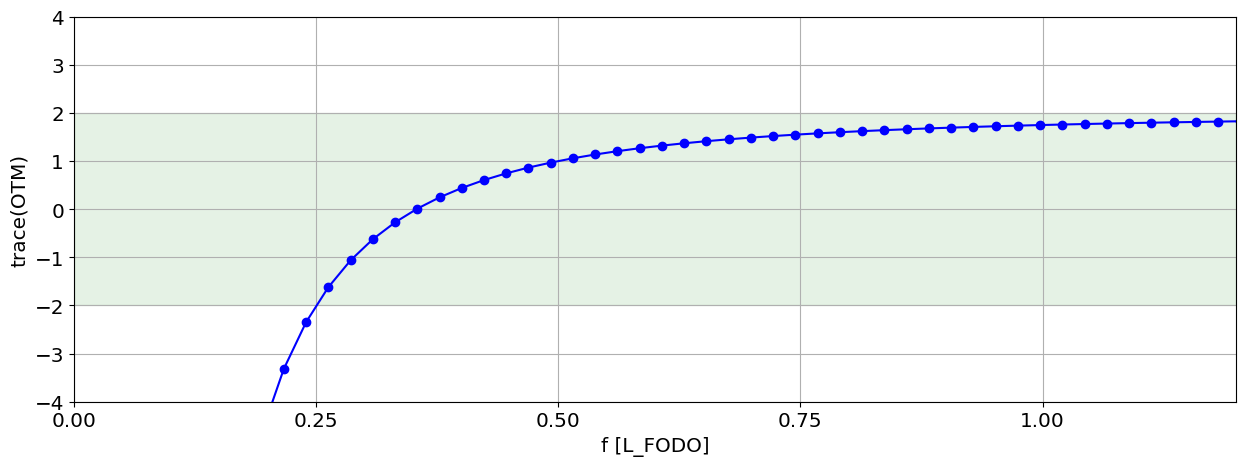

In [8]:
def myOTM_trace(L, f):
    fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
    OTM = getEquivalentElement(fodo_lattice)
    return np.trace(OTM[0]['matrix'])

def setShadedRegion(ax,color='g' ,xLimit=[0,1], yLimit='FullRange',alpha=.1):
    """
    setShadedRegion(ax,color='g' ,xLimit=[0,1],alpha=.1)
    ax: plot axis to use
    color: color of the shaded region
    xLimit: vector with two scalars, the start and the end point
    alpha: transparency settings
    yLimit: if set to "FullRange" shaded the entire plot in the y direction
    If you want to specify an intervall, please enter a two scalar vector as xLimit
    """
    if yLimit == 'FullRange':
        aux = ax.get_ylim()
        plt.gca().fill_between(xLimit, [aux[0],aux[0]],  [aux[1],aux[1]],color=color, alpha=alpha)
        ax.set_ylim(aux)
    else:
        plt.gca().fill_between(xLimit, 
                    [yLimit[0],yLimit[0]],  [yLimit[1],yLimit[1]],color=color, alpha=alpha)

L = 2  
f_range = np.linspace(.5,5)
plt.plot(f_range/(L*2), [myOTM_trace(L, f) for f in f_range],'-bo')
plt.xlim([0,1.2])
my_xlim = plt.xlim()
setShadedRegion(plt.gca(),xLimit=my_xlim,yLimit=[-2,2])
plt.ylim(-4,4)
plt.xlim(my_xlim);
plt.xticks([0, .25, .5, .75,1])
plt.xlabel('f [L_FODO]')
plt.ylabel('trace(OTM)')
plt.grid(True)

### Exercise 21

Consider our usual FODO cell starting from the middle of a drift, and which allows for having a periodic solution (i.e. $f > L_{FODO}/4$)
Compute the periodic $\sigma_0$ matrix using the Twiss parameters obtain for the newly defined `twiss` function (assuming $\epsilon=1$).

Transport the periodic $\Sigma$ matrix along the FODO and convince yourself that the $\Sigma_s$ matrix at the end of the FODO is indeed equal to the one at the start, $\Sigma_0$.

#### SOLUTION

Text(0, 0.5, 'n.a.')

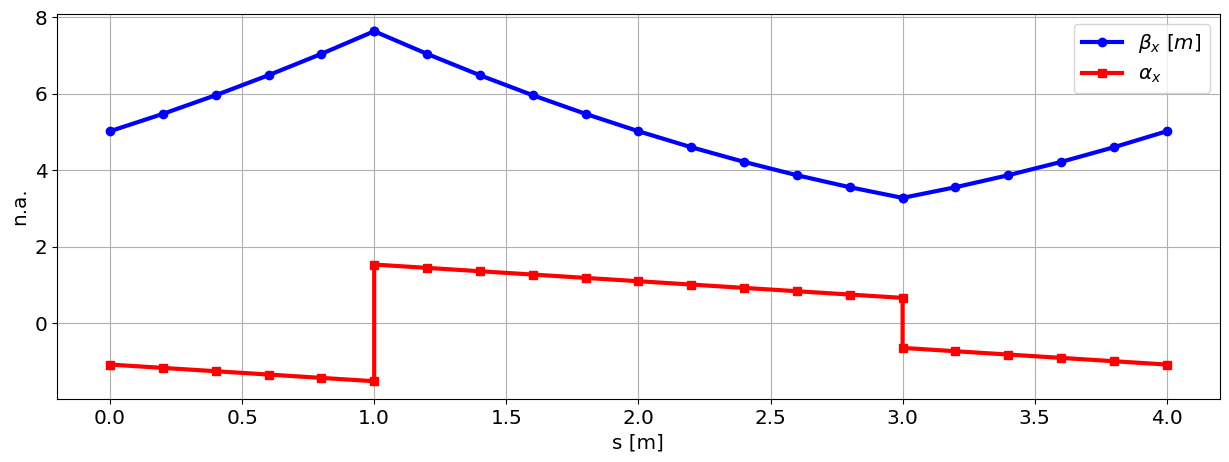

In [9]:
f = 2.5
L = 2
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)

# compute closed solution
tune, beta, alpha, gamma = twiss(fodo_lattice)
# build sigma matrix
sigma_0 = np.array([[beta, -alpha],[-alpha, gamma]])
# transport it
transported_sigmas = transportSigmas(sigma_0, fodo_lattice)

plt.plot(transported_sigmas['s'],  transported_sigmas['sigma11'], 'o-b', lw=3, label='$\\beta_x\ [m]$')
plt.plot(transported_sigmas['s'], -transported_sigmas['sigma12'], 's-r', lw=3, label='$\\alpha_x$')
    
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('s [m]')
plt.ylabel('n.a.')

#plt.savefig('exercise_23.pdf')
#plt.title('Exercise 23')

In [10]:
print(f"Initial Sigma: \n{transported_sigmas['sigmas'][0,:,:]}")
print(f"Final Sigma: \n{transported_sigmas['sigmas'][-1,:,:]}")

Initial Sigma: 
[[5.01901148 1.09108945]
 [1.09108945 0.43643578]]
Final Sigma: 
[[5.01901148 1.09108945]
 [1.09108945 0.43643578]]


> Indeed, initial and final Sigma matrices are identical (within numerical precision)!

### Exercise 22
Write down the numerical values of initial beam matrix $\Sigma_0$, then build a beam line made of $15$ consecutive cells by changing the definition of the lattice and then, using $\Sigma_0$ with the noted-down numbers, prepare a plot of the beam sizes along the $15$ cells. 
Is this also periodic?

#### SOLUTION

Text(0.5, 0, 's [m]')

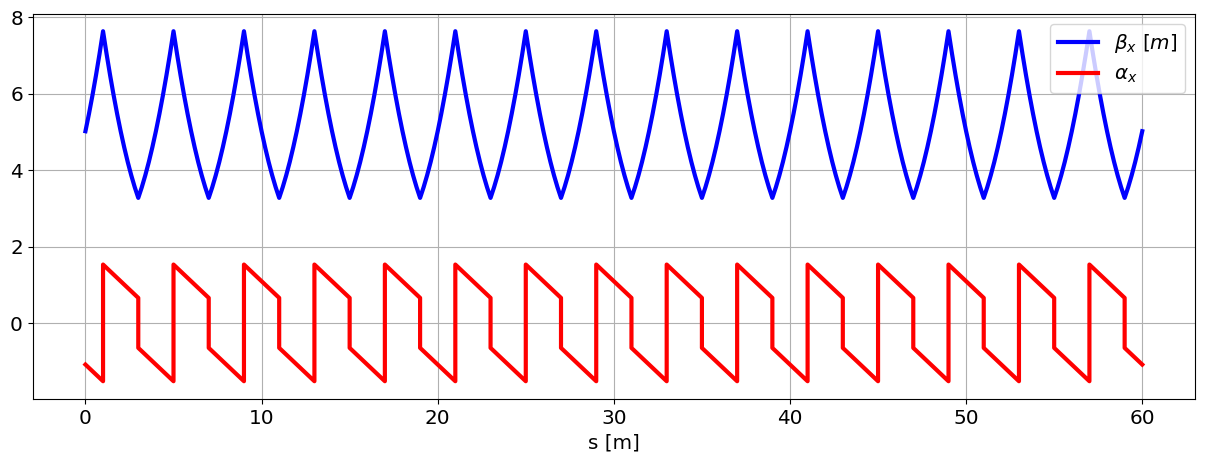

In [11]:
# as before:
f = 2.5
L = 2
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
tune, beta, alpha, gamma = twiss(fodo_lattice)
sigma_0 = np.array([[beta, -alpha],[-alpha, gamma]])

# transport the solution found on a single cell over 15 cells
transported_sigmas = transportSigmas(sigma_0, 15*fodo_lattice)

plt.plot(transported_sigmas['s'],  transported_sigmas['sigma11'], '-b', lw=3, label='$\\beta_x\ [m]$')
plt.plot(transported_sigmas['s'], -transported_sigmas['sigma12'], '-r', lw=3, label='$\\alpha_x$')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('s [m]')

### Exercise 23

Consider our usual FODO cell.
Consider a single particle with some non-zero initial $x_0$ and/or $x_0'$, and plot the $x$, $x'$ coordinates at the end of each FODO cell for a beamline made of 100 cells. 

**Hint:** You should use both `getEquivalentElement` to obtain the single FODO cell element, and `transportParticles` function to track the particle over several of such a cell.

**Hint:** use `plt.scatter(output['x'], output['px'])` to plot all phase-space coordinates.

#### SOLUTIONS
For plotting the trace space evolution of a particle we need to observe it turn-after-turn. The natural way to do that is to compress the beam line (in general composed by more than one element) in a single transformation: the one-turn-matrix, which can be computed using the `getEquivalentElement` function previously introduced.

In [12]:
f = 2.5
L = 2
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
OTM = getEquivalentElement(fodo_lattice)
def plotIt(x, xp):
    particle = [[x],[xp]]
    transported_particles = transportParticles(particle,100*OTM)
    plt.scatter(transported_particles['x'], transported_particles['xp'], c = transported_particles['s']/(L*2))
    cb=plt.colorbar()
    cb.set_label('Turns')
    plt.xlabel('x [mm]')
    plt.ylabel("x' [mrad]")
    plt.xlim(-13,13)
    plt.ylim(-5,5)
    plt.grid(True)
    

interactive_plot = interactive(plotIt,x=(-2,2,.1),xp=(-2,2,.1),continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

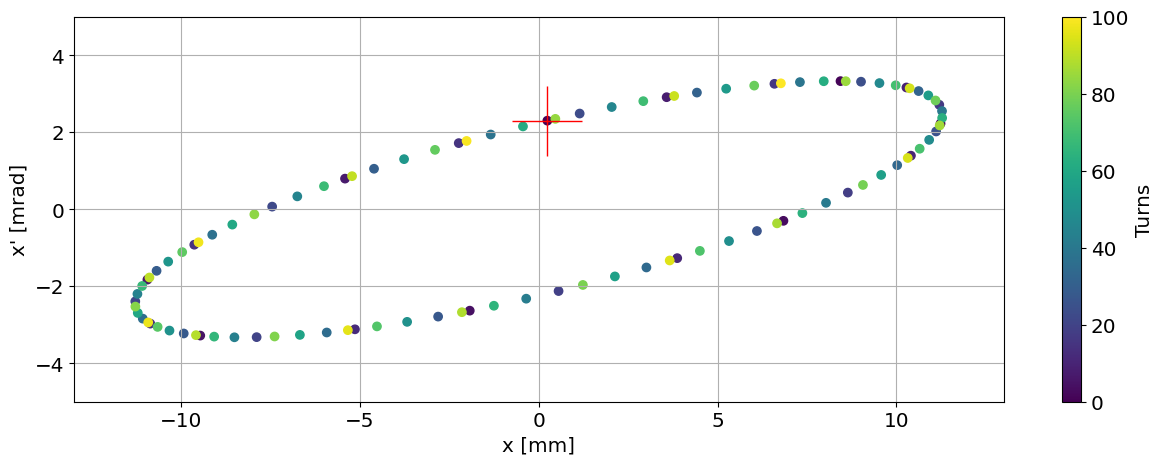

In [13]:
#  An example of static plot for saving...
x =.24
px = 2.3
plotIt(x, px)
plt.plot(x, px,'+r', ms=50)
#plt.savefig('exercise_18.pdf')

### Exercise 24 (optional)
In the definition of FODO of the previous exercise, reverse the polarity of both quadrupoles and prepare a phase-space plot. How does it differ from the one in Exercise 18?

#### SOLUTION

In [14]:
f = -2.5
L = 2
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
OTM = getEquivalentElement(fodo_lattice)
def plotIt(x, xp):
    particle = [[x],[xp]]
    transported_particles = transportParticles(particle,100*OTM)
    plt.scatter(transported_particles['x'], transported_particles['xp'], c = transported_particles['s']/(L*2))
    cb=plt.colorbar()
    cb.set_label('Turns')
    plt.xlabel('x [mm]')
    plt.ylabel("x' [mrad]")
    plt.xlim(-13,13)
    plt.ylim(-5,5)
    plt.grid(True)

interactive_plot = interactive(plotIt,x=(-2,2,.1),xp=(-2,2,.1),continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

---

## Ellipses ans Single Particle Emittance

It turns out that our particle turn-after-turn stays on an ellipses: 

\begin{equation}
\epsilon = \gamma x^2 + 2 \alpha x x' + \beta x'\,^2
\end{equation}

where $(\alpha, \beta, \gamma)$ are the periodic Twiss parameter! and $\epsilon$, in this case, is the **single particle emittance**.

Without entering in the implementation details, let's define two useful functions that can give us the single particle emittance (`particle_emittance(x, xp, beta, alpha)`) or to give us the coordinate in phase space for an ellipse with the given Twiss and emittance (`ellipse_points(emittance, beta, alpha, n_points = 100)`)

In [15]:
def particle_emittance(x, xp, beta, alpha):
    '''Returns the single particle emittance for a given 
       x, xp particle coordinates and assumed beta and alpha parameters
    '''
    # compute gamma
    gamma = (alpha**2 + 1)/beta
    # compute and return the associated single particle emittance
    epsilon = gamma*x**2 + 2*alpha*x*xp + beta*xp**2
    return epsilon

def ellipse_points(emittance, beta, alpha, n_points = 100):
    ''' Returns the x,x' coordinates of an ellipse in phase space for 
        the given Twiss parameters (beta, gamma, emittance)
    '''
    # generate a uniform sampling of phases:
    thetas = np.linspace(0, 2*np.pi, n_points)
    # generate coordinates
    x  = np.sqrt(emittance*beta)*np.cos(thetas)
    xp = -np.sqrt(emittance/beta)*(alpha*np.cos(thetas)-np.sin(thetas))
    # return them in our usual form
    return np.array([x, xp])


### Exercise 25

Consider the usual FODO cell, repeated 100 times.
Plot the trajectory, in phase space, of a particle with x=1 mm and xp=0 cell after cell.

Using the functions you have now available, compute the expected periodic solution of our cell, and use this information to:

- compute the single particle emittance
- produce the coordinates in phase space of an ellipse with such an emittance

Plot both the tracked particle coordinates and the ellipse in phase space: what do you observe?

**Optional:** would you be able to predict the exact tracked particle coordinates only from the single cell?

**Hint:** for this latter question, one needs to look carefully at the functions implementation details...


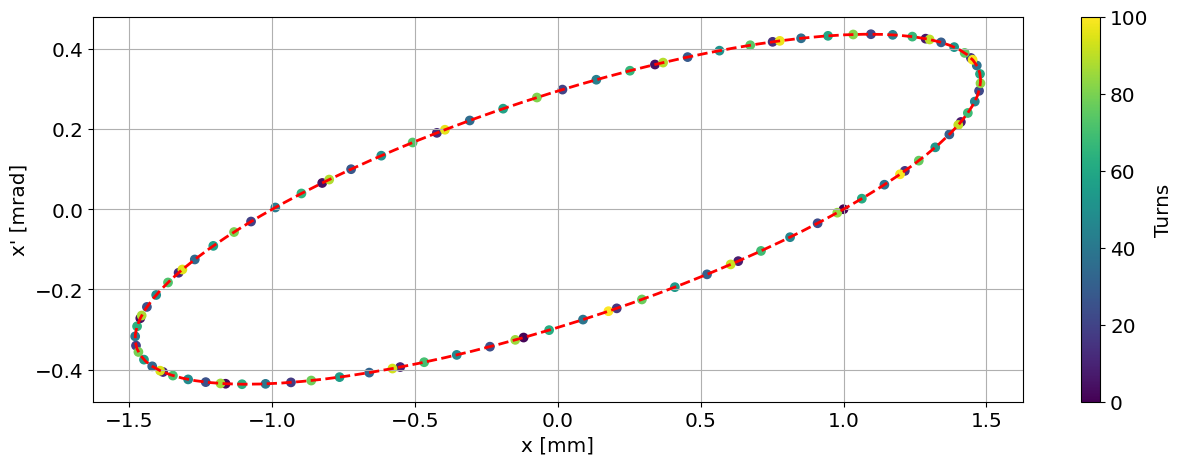

In [16]:
# define our usual FODO cell
f = 2.5
L = 2
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)

# compute the periodic solution
tune, beta, alpha, gamma = twiss(fodo_lattice)

# generate a particle
x = 1
xp = 0
particle = [[x],[xp]]

# compute the associate single-particle emittance of this particle
single_part_emit = particle_emittance(x, xp, beta, alpha)
# get coordinate of an ellipse in phase space with the given parameters
ellipse_coordinates = ellipse_points(single_part_emit, beta, alpha)

# track the particle over 100 cells
OTM = getEquivalentElement(fodo_lattice)
transported_particles = transportParticles(particle,100*OTM)

# plot tracked particles as well as ellipse
plt.plot(ellipse_coordinates[0,:], ellipse_coordinates[1,:],'r--', lw=2)
plt.scatter(transported_particles['x'], transported_particles['xp'], c = transported_particles['s']/(L*2))
cb=plt.colorbar()
cb.set_label('Turns')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.grid(True)
    


### Exercise 26
Plot the position of the particle vs the number of turns. 

1. What do you observe?
2. Can you infer the tune? 
3. How many turns (or FODO cells) are needed for the particle to complete one full oscillation?
4. What changes if you start from a different initial coordinate?

#### SOLUTION

The expected single-cell tune is 0.131.
 => Over 100 one expects to see 13.099 oscillations!


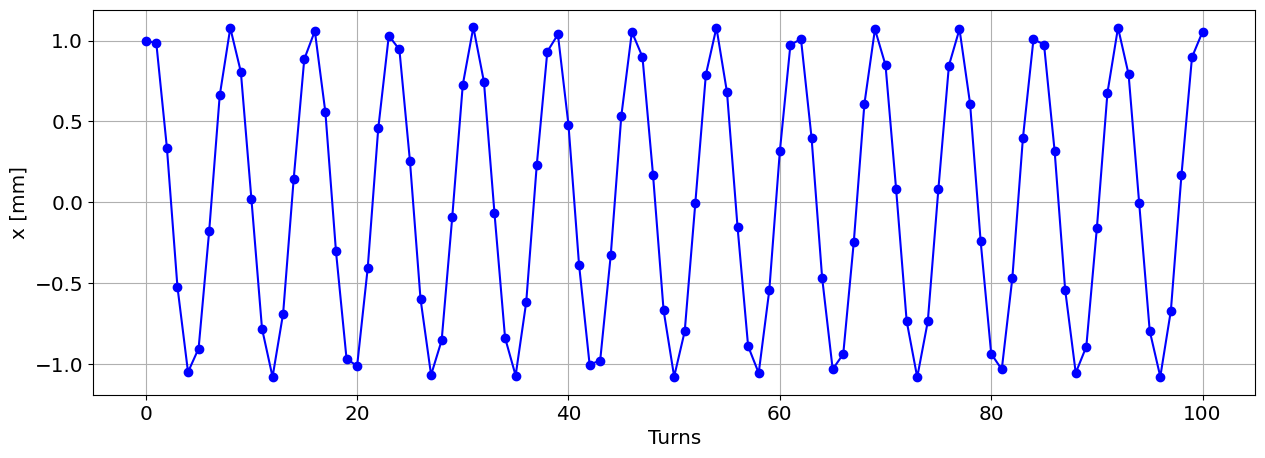

In [17]:
f = 2.5
L_2 = 2
n_turns = 100
fodo_lattice = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
OTM = getEquivalentElement(fodo_lattice)
particle = [[1],[.3]]
transported_particles = transportParticles(particle,n_turns*OTM)

plt.plot(transported_particles['s']/(L*2), transported_particles['x'] ,'o-b')
plt.xlabel('Turns')
plt.ylabel('x [mm]')
plt.grid(True)

# let's compute the tune from the OTM
tune, beta, alpha, gamma = twiss(OTM)
print(f'The expected single-cell tune is {tune:.3f}.')
print(f' => Over {n_turns} one expects to see {n_turns*tune:.3f} oscillations!')

We clearly see a betatronic oscillation. And this is true also for x' (se below, and note the different amplitude and phase).

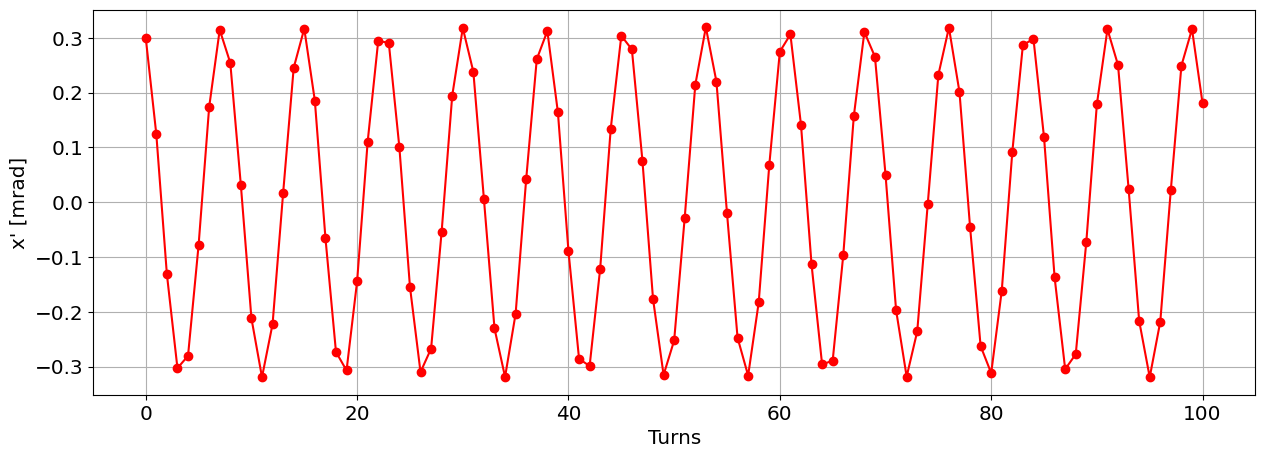

In [18]:
plt.plot(transported_particles['s']/(L_2*2), transported_particles['xp'] ,'o-r')
plt.xlabel('Turns')
plt.ylabel("x' [mrad]")
plt.grid(True)

### Exercise 27

Consider a single FODO cell of total length $L_{FODO}=2$ m. 

1. Can you find $f$ such that the FODO cell phase advance is $\mu = \pi/2$, i.e. 90 deg phase-advance?
2. Repeat this cell 100 times, and plot the trajectory, in phase space, of a particle with x=1 mm and xp=0 cell after cell: what do you observe?
3. (Optional) Show that the similar results are obtained irrespectively if you start your FODO from the middle of a quadrupole or of a drift.

**Hint:** Look back at [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/):

<p align="center">
<img src=./_img_exercises/slide_fodo_phase.png width="60%">
</p>

and recall that $\mathrm{Tr}(M) = 2 \cos(\mu)$. 
With some math, one can prove that:

\begin{equation}
\sin(\mu/2) = \frac{L_{FODO}}{4f}
\end{equation}



#### SOLUTION

In [19]:
# let's build up the FODO cell using the provided inputs
L_2 = 2
desired_mu = np.pi/2

f = L_2/(4*np.sin(desired_mu/2))
L = L_2/2

# fodo starting from the middle of a quad
fodo_lattice_1 = Q(2*f) + 10*D(L/10) + Q(-f) + 10*D(L/10) + Q(2*f)
# or drift
fodo_lattice_2 = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)

tune, beta, alpha, gamma = twiss(fodo_lattice_1)
print(f'Fodo starting in the quad: tune is {tune}.')
tune, beta, alpha, gamma = twiss(fodo_lattice_2)
print(f'Fodo starting in the drift: tune is {tune}.')

Fodo starting in the quad: tune is 0.24999999999999986.
Fodo starting in the drift: tune is 0.24999999999999992.


In [20]:
1/np.sqrt(2)

0.7071067811865475

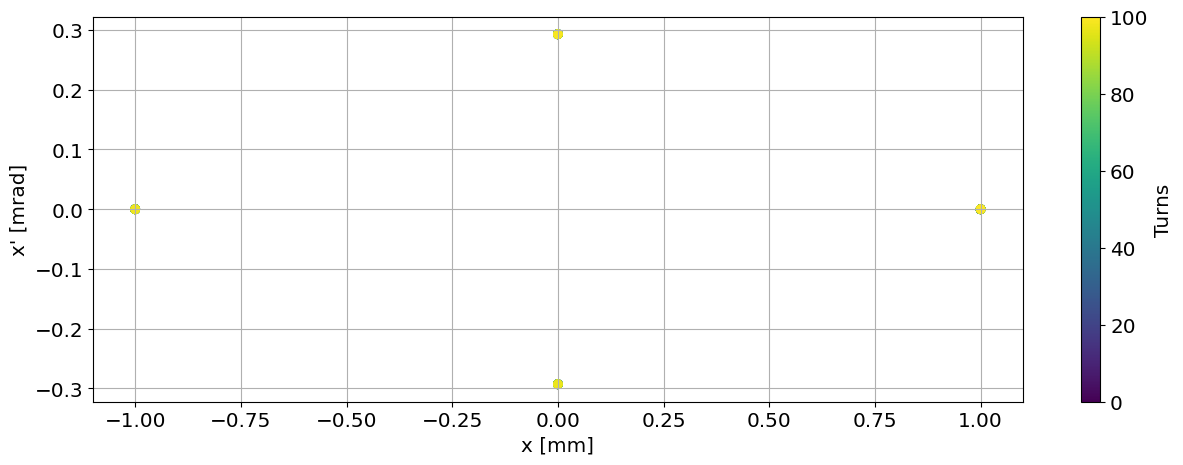

In [21]:
# generate a particle
x = 1
xp = 0
particle = [[x],[xp]]

# track the particle over 100 cells
OTM = getEquivalentElement(fodo_lattice_1)
transported_particles = transportParticles(particle,100*OTM)

# plot tracked particles as well as ellipse
plt.scatter(transported_particles['x'], transported_particles['xp'], c = transported_particles['s']/(L*2))
cb=plt.colorbar()
cb.set_label('Turns')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.grid(True)
    

> This time only 4 points in phase-space are shown, as the phase advance is 1/4 in units of 2*pi!, hence the particle does "1/4" of a turn in phase space after each FODO cell...